In [6]:
import networkx as nx
import numpy as np
import sys
from matplotlib import pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [7]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

# returns a LaTeX bmatrix with dots in both rowwise and columnwise directions 
# for matrices larger than 8x8,
# for each row, the first 4 and last 4 elements are printed out
# for each column, the first 4 and last 4 elements are printed out
def bmatrix_with_dots_in_both_directions(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    rv = ["\\begin{bmatrix}"]
    # print everything in one line and limit to 5 decimal places
    if a.shape[0] <= 8 and a.shape[1] <= 8:
        rv += [', '.join([str(round(x, 5)) for x in a.flatten()])] 
    else:
        for i in range(4):
            rv += [', '.join([str(round(x, 5)) for x in a[i, :]])]
        rv += ["\\vdots"]
        for i in range(a.shape[0]-4, a.shape[0]):
            rv += [', '.join([str(round(x, 5)) for x in a[i, :]])]
    rv +=  ["\\end{bmatrix}"]
    return '\n'.join(rv)

def bmatrix_with_dots(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    rv = ["\\begin{bmatrix}"]
    # print everything in one line and limit to 5 decimal places
    if a.shape[0] <= 8 and a.shape[1] <= 8:
        rv += [', '.join([str(round(x, 5)) for x in a.flatten()])] 
    else:
        for i in range(4):
            rv += [', '.join([str(round(x, 5)) for x in a[i, :]])]
        rv += ["\\vdots"]
        for i in range(a.shape[0]-4, a.shape[0]):
            rv += [', '.join([str(round(x, 5)) for x in a[i, :]])]
    rv +=  ["\\end{bmatrix}"]
    return '\n'.join(rv)

    

def matrix_with_commas_in_between(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('matrix_with_commas_in_between can at most display two dimensions')
    rv = ["["]
    # print everything in one line and limit to 5 decimal places
    rv += [', '.join([str(round(x, 5)) for x in a.flatten()])] 
    rv +=  ["]"]
    return '\n'.join(rv)


(4, 3)
[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]
 [ 0.  0. -1.]]
(4, 10)
(3, 10)
(3, 10)
\begin{bmatrix}
  1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  -1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & -1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & -1. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 1. & 0. & 0. & -1. & 1. & -0. & -0.\\
  0. & 0. & 0. & 0. & 1. & 0. & -0. & -1. & 1. & -0.\\
  0. & 0. & 0. & 0. & 0. & 1. & -0. & -0. & -1. & 1.\\
  -1. & -0. & -0. & 1. & 0. & 0. & 0. & 0. & 0. & 0.\\
  -0. & -1. & -0. & 0. & 1. & 0. & 0. & 0. & 0. & 0.\\
  -0. & -0. & -1. & 0. & 0. & 1. & 0. & 0. & 0. & 0.\\
\end{bmatrix}
========================= 1x1x4 SP Table =========================
Eigenval:  (1+0j) \\
Eigenvec:  [
0j, 0j, 0j, 0j, -0j, 0j, 0j, 0j, 0j, -0j
] \\
Eigenval:  (1+0j) \\
Eigenvec:  [
0j, 0j, 0j, 0j, -0j, 0j, 0j, 0j, 0j, -0j
] \\
Eigenval:  (1+0j) \\
Eigenvec:  [
(0.34948+0j), (0.34948+0j), (0.34948+0j), 0j, -0j, 0j, 0j, 0j, 0j, -0j
] \\


/tmp/ipykernel_24392/487465482.py:12: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  incidence_matrix = -nx.incidence_matrix(G, oriented=True)
/tmp/ipykernel_24392/471047170.py:73: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  rv += [', '.join([str(round(x, 5)) for x in a.flatten()])]


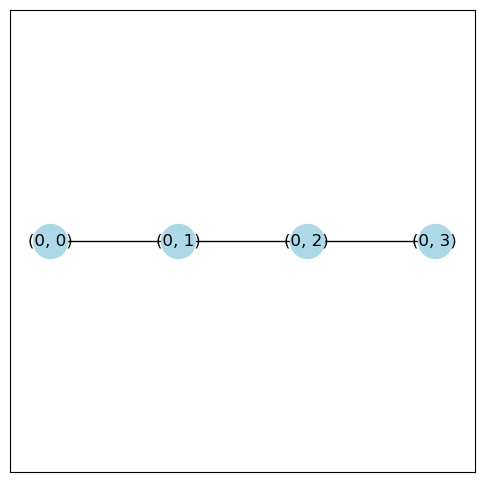

In [8]:
# 1x1x4
# A : 4x3
G = nx.grid_graph((4,1))

plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw_networkx(G, pos=pos, 
        node_color='lightblue', 
        with_labels=True,
        node_size=600)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)
A = incidence_matrix.toarray()
print(A.shape)
print(A)

# number of nodes, branches
num_nodes = A.shape[0]
num_branches = A.shape[1]

# K : 3x3
K_v = -1 * np.eye(num_branches)
K_i = np.eye(num_branches)

# sparse table analysis
a = np.block([[A, np.zeros((4, 4)), np.zeros((4, 3))]])
b = np.block([[np.zeros((3, 3)), np.eye(3), -A.T]])
c = np.block([[K_v, K_i, np.zeros((3, 4))]])

print(a.shape)
print(b.shape)
print(c.shape)

SP = np.concatenate((a,b,c), axis=0)

print(bmatrix(SP))

print("========================= 1x1x4 SP Table =========================")
L, V = np.linalg.eig(SP)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(2 * num_branches + num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")

print("========================= 1x1x4 Nodal Analysis =========================")
# nodal analysis
Y = A@K_v@A.T
print(bmatrix(Y))
L, V = np.linalg.eig(Y)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")


In [9]:
# Tree/Link Analysis
# G Matrix
mG = -1 * np.eye(3)
L, V = np.linalg.eig(mG)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(3):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")



Eigenval:  -1.0 \\
Eigenvec:  [
0.0, 0.0, 1.0
] \\
Eigenval:  -1.0 \\
Eigenvec:  [
0.0, 1.0, 0.0
] \\
Eigenval:  -1.0 \\
Eigenvec:  [
1.0, 0.0, 0.0
] \\


/tmp/ipykernel_24392/3091950053.py:12: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  incidence_matrix = -nx.incidence_matrix(G, oriented=True)
/tmp/ipykernel_24392/471047170.py:73: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  rv += [', '.join([str(round(x, 5)) for x in a.flatten()])]


(16, 24)
\begin{bmatrix}
  1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & -1. & 1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & -1. & 1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & -1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  -1. & 0. & 0. & 0. & 0. & 0. & 0. & 1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & -1. & 0. & 0. & 0. & 0. & 0. & -1. & 1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & -1. & 0. & 0. & 0. & 0. & 0. & -1. & 1. & 1. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & -1. & 0. & 0. & 0. & 0. & 0. & -1. & 1. & 0. & 0. & 0. & 0.\\
  0. 

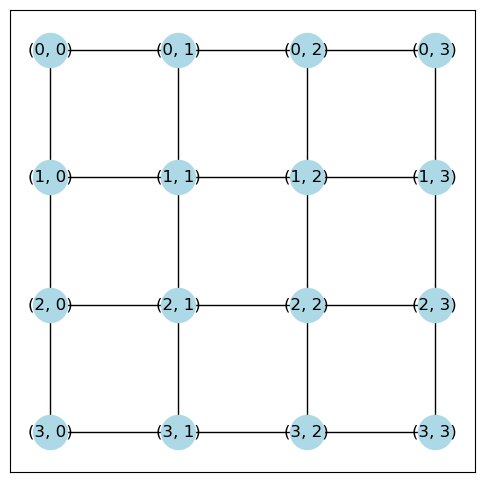

In [10]:
# 1x4x4
# A : 16x24
G = nx.grid_graph((4,4))

plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw_networkx(G, pos=pos, 
        node_color='lightblue', 
        with_labels=True,
        node_size=600)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)
A = incidence_matrix.toarray()
print(A.shape)
print(bmatrix(A))

# number of nodes, branches
num_nodes = A.shape[0]
num_branches = A.shape[1]

# K : 3x3
K_v = -1 * np.eye(num_branches)
K_i = np.eye(num_branches)

print(bmatrix(K_v))
print(bmatrix(K_i))

# sparse table analysis
a = np.block([[A, np.zeros((num_nodes, num_branches)), np.zeros((num_nodes, num_nodes))]])
print(a.shape)
b = np.block([[np.zeros((num_branches, num_branches)), np.eye(num_branches), -A.T]])  # 24x16
print(b.shape)
c = np.block([[K_v, K_i, np.zeros((num_branches, num_nodes))]])
print(c.shape)

SP = np.concatenate((a,b,c), axis=0)

print(bmatrix(SP))

print("========================= 1x4x4 SP Table =========================")
L, V = np.linalg.eig(SP)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(2 * num_branches + num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")

print("========================= 1x4x4 Nodal Analysis =========================")
# nodal analysis
Y = A@K_v@A.T

print(bmatrix(Y))

L, V = np.linalg.eig(Y)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")




In [11]:
# 4x4x4
# A : 64x96
G = nx.grid_graph((4,4,4))

plt.figure(figsize=(6,6))
# pos = {(x,y):(y,-x) for x,y in G.nodes()}
# nx.draw_networkx(G, pos=pos, 
#         node_color='lightblue', 
#         with_labels=True,
#         node_size=600)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)
A = incidence_matrix.toarray()
print(A.shape)
print(bmatrix(A))

# number of nodes, branches
num_nodes = A.shape[0]
num_branches = A.shape[1]

# K : 3x3
K_v = -1 * np.eye(num_branches)
K_i = np.eye(num_branches)

print(bmatrix(K_v))
print(bmatrix(K_i))

# sparse table analysis
a = np.block([[A, np.zeros((num_nodes, num_branches)), np.zeros((num_nodes, num_nodes))]])
print(a.shape)
b = np.block([[np.zeros((num_branches, num_branches)), np.eye(num_branches), -A.T]])  # 24x16
print(b.shape)
c = np.block([[K_v, K_i, np.zeros((num_branches, num_nodes))]])
print(c.shape)

SP = np.concatenate((a,b,c), axis=0)

print("========================= 4x4x4 SP Table =========================")
L, V = np.linalg.eig(SP)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(2 * num_branches + num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")

print("========================= 4x4x4 Nodal Analysis =========================")
# nodal analysis
Y = A@K_v@A.T
print(Y)
L, V = np.linalg.eig(Y)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")


(64, 144)
\begin{bmatrix}
  1. & 1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & -1. & 1. & 1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0

/tmp/ipykernel_24392/1088858555.py:12: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  incidence_matrix = -nx.incidence_matrix(G, oriented=True)


\begin{bmatrix}
  -1. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0.\\
  -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0.\\
  -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0.\\
  -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0.\\
  -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0.\\
  -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0.\\
  -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0.\\
  -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0.\\
  -0. & -1. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & -0. & 

/tmp/ipykernel_24392/471047170.py:73: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  rv += [', '.join([str(round(x, 5)) for x in a.flatten()])]


Eigenvec:  [
(-0.04128+0.01247j), (-0.04128-0.01247j), (0.04672+0.00706j), (0.04672-0.00706j), (0.03008+0.00146j), (0.03008-0.00146j), (-0.00839+0.0183j), (-0.00839-0.0183j), (-0.00189+0.04397j), (-0.00189-0.04397j), (-0.00934+0.0231j), (-0.00934-0.0231j), (-0.02031+0.01839j), (-0.02031-0.01839j), (0.00165+0j), (-0.04875-0.01155j), (-0.04875+0.01155j), (-0.01737-0.0619j), (-0.01737+0.0619j), (-0.01771+0.01073j), (-0.01771-0.01073j), (0.00635-0.01899j), (0.00635+0.01899j), (-0.01956-0.05157j), (-0.01956+0.05157j), (-0.01513+0.03188j), (-0.01513-0.03188j), (-0.02152+0.04989j), (-0.02152-0.04989j), (0.02225+0j), (0.02825-0.04129j), (0.02825+0.04129j), (-0.02012+0.02274j), (-0.02012-0.02274j), (-0.00947+0.01321j), (-0.00947-0.01321j), (-0.00624-0.05074j), (-0.00624+0.05074j), (-0.01926-0.06286j), (-0.01926+0.06286j), (0.01654-0.00378j), (0.01654+0.00378j), (0.01558-0.00014j), (0.01558+0.00014j), (-0.01497+0.00392j), (-0.01497-0.00392j), (-0.02601+0.00809j), (-0.02601-0.00809j), (0.03075+0.

<Figure size 600x600 with 0 Axes>

In [12]:
# Tree/Link Analysis
# this is a 15x24 matrix
m = np.zeros((15,24))
# 1 for (0, a)
m[0,0] = 1
# -1 for (0, e)
m[0,4] = -1
# -1 for (0, f)
m[0,5] = -1
# -1 for (0, g)
m[0,6] = -1

# 1 for (1, b)
m[1,1] = 1
# -1 for (1, f)
m[1,5] = -1
# -1 for (1, g)
m[1,6] = -1

# 1 for (2, c)
m[2,2] = 1
# -1 for (2, g)

# 1 for (4, h)
m[4,7] = 1
# -1 for (4, l)
m[4,11] = -1
# -1 for (4, m)
m[4,12] = -1
# -1 for (4, n)
m[4,13] = -1

# 1 for (5, i)
m[5,8] = 1
# -1 for (5, m)
m[5,12] = -1
# -1 for (5, n)
m[5,13] = -1

# 1 for (6, j)
m[6,9] = 1
# -1 for (6, n)
m[6,13] = -1

# 1 for (8, o)
m[8,14] = 1
# -1 for (8, s)
m[8,18] = -1
# -1 for (8, t)
m[8,19] = -1
# -1 for (8, u)

# 1 for (9, p)
m[9,15] = 1
# -1 for (9, t)
m[9,19] = -1
# -1 for (9, u)
m[9,20] = -1

# 1 for (10, q)
m[10,16] = 1
# -1 for (10, u)
m[10,20] = -1

# 1 for (12, v)
m[12,21] = 1
# -1 for (12, s)
m[12,18] = -1
# -1 for (12, t)
m[12,19] = -1
# -1 for (12, u)
m[12,20] = -1

# 1 for (13, w)
m[13,22] = 1
# -1 for (13, t)
m[13,19] = -1
# -1 for (13, u)
m[13,20] = -1

# 1 for (14, x)
m[14,23] = 1
# -1 for (14, u)
m[14,20] = -1

# 1 for (3, d)
m[3,3] = 1
# 1 for (3, e)
m[3,4] = 1
# 1 for (3, f)
m[3,5] = 1
# 1 for (3, g)
m[3,6] = 1

# 1 for (7, k)
m[7,10] = 1
# 1 for (7, l)
m[7,11] = 1
# 1 for (7, m)
m[7,12] = 1
# 1 for (7, n)
m[7,13] = 1

# 1 for (11, r)
m[11,17] = 1
# 1 for (11, s)
m[11,18] = 1
# 1 for (11, t)
m[11,19] = 1
# 1 for (11, u)
m[11,20] = 1

print(bmatrix(m))
print(bmatrix(-1 * m.T))

GEER = np.block([[-1 * np.eye(15), m], [-1 * m.T, np.eye(24)]])
print(GEER.shape)

print(bmatrix(GEER))
L, V = np.linalg.eig(GEER)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(GEER.shape[0]):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")



\begin{bmatrix}
  1. & 0. & 0. & 0. & -1. & -1. & -1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 1. & 0. & 0. & 0. & -1. & -1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 1. & 1. & 1. & 1. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 1. & 0. & 0. & 0. & -1. & -1. & -1. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 1. & 0. & 0. & 0. & -1. & -1. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 1. & 0. & 0. & 0. & -1. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 0. & 1. & 1. & 1. & 1. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0

/tmp/ipykernel_24392/471047170.py:73: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  rv += [', '.join([str(round(x, 5)) for x in a.flatten()])]


In [13]:
# this is a 63x144 matrix
m = np.zeros((63,144))

cutset = [0, 4, 8, 1, 5, 9, 2, 6, 10, 3, 7, 11] + [21, 22, 23] + [39] + [40, 44, 48, 41, 45, 49, 42, 46, 50, 43, 47, 51] + [61, 62, 63] + [79] + [80, 84, 88, 81, 85, 89, 82, 86, 90, 83, 87, 91] + [101, 102, 103] + [119] + [120, 124, 128, 121, 125, 129, 122, 126, 130, 123, 127, 131] + [141, 142, 143]
print(sorted(cutset))

# bottom row, first column
# 1 for (0, 0)
m[cutset.index(0),0] = 1
# 1 for (0, 12)
m[cutset.index(0),12] = 1
# -1 for (0, 24)
m[cutset.index(0),24] = -1

# 1 for (4, 4)
m[cutset.index(4),4] = 1
# 1 for (4, 15)
m[cutset.index(4),15] = 1
# -1 for (4, 28)
m[cutset.index(4),28] = -1
# 1 for (4, 12)
m[cutset.index(4),12] = 1
# -1 for (4, 24)
m[cutset.index(4),24] = -1

# 1 for (8, 8)
m[cutset.index(8),8] = 1
# 1 for (8, 18)
m[cutset.index(8),18] = 1
# -1 for (8, 32)
m[cutset.index(8),32] = -1
# 1 for (8, 15)
m[cutset.index(8),15] = 1
# -1 for (8, 28)
m[cutset.index(8),28] = -1
# 1 for (8, 12)
m[cutset.index(8),12] = 1
# -1 for (8, 24)
m[cutset.index(8),24] = -1

# 1 for (21, 21)
m[cutset.index(21),21] = 1
# -1 for (21, 36)
m[cutset.index(21),36] = -1
# 1 for (21, 18)
m[cutset.index(21),18] = 1
# -1 for (21, 32)
m[cutset.index(21),32] = -1
# 1 for (21, 15)
m[cutset.index(21),15] = 1
# -1 for (21, 28)
m[cutset.index(21),28] = -1
# 1 for (21, 12)
m[cutset.index(21),12] = 1
# -1 for (21, 24)
m[cutset.index(21),24] = -1

# bottom row, second column
# 1 for (40, 40)
m[cutset.index(40),40] = 1
# 1 for (40, 24)
m[cutset.index(40),24] = 1
# -1 for (40, 64)
m[cutset.index(40),64] = -1
# 1 for (40, 52)
m[cutset.index(40),52] = 1

# 1 for (44, 44)
m[cutset.index(44),44] = 1
# 1 for (44, 28)
m[cutset.index(44),28] = 1
# -1 for (44, 68)
m[cutset.index(44),68] = -1
# 1 for (44, 55)
m[cutset.index(44),55] = 1
# -1 for (44, 64)
m[cutset.index(44),64] = -1
# 1 for (44, 52)
m[cutset.index(44),52] = 1
# 1 for (44, 24)
m[cutset.index(44),24] = 1

# 1 for (48, 48)
m[cutset.index(48),48] = 1
# 1 for (48, 32)
m[cutset.index(48),32] = 1
# -1 for (48, 72)
m[cutset.index(48),72] = -1
# 1 for (48, 58)
m[cutset.index(48),58] = 1
# -1 for (48, 68)
m[cutset.index(48),68] = -1
# 1 for (48, 55)
m[cutset.index(48),55] = 1
# 1 for (48, 28)
m[cutset.index(48),28] = 1
# -1 for (48, 64)
m[cutset.index(48),64] = -1
# 1 for (48, 52)
m[cutset.index(48),52] = 1
# 1 for (48, 24)
m[cutset.index(48),24] = 1

# 1 for (61, 61)
m[cutset.index(61),61] = 1
# -1 for (61, 76)
m[cutset.index(61),76] = -1
# 1 for (61, 36)
m[cutset.index(61),36] = 1
# 1 for (61, 58)
m[cutset.index(61),58] = 1
# -1 for (61, 72)
m[cutset.index(61),72] = -1
# 1 for (61, 32)
m[cutset.index(61),32] = 1
# 1 for (61, 55)
m[cutset.index(61),55] = 1
# -1 for (61, 68)
m[cutset.index(61),68] = -1
# 1 for (61, 28)
m[cutset.index(61),28] = 1
# 1 for (61, 52)
m[cutset.index(61),52] = 1
# 1 for (61, 24)
m[cutset.index(61),24] = 1
# -1 for (61, 64)
m[cutset.index(61),64] = -1

# bottom row, third column
# 1 for (80, 80)
m[cutset.index(80),80] = 1
# 1 for (80, 64)
m[cutset.index(80),64] = 1
# -1 for (80, 104)
m[cutset.index(80),104] = -1
# 1 for (80, 92)
m[cutset.index(80),92] = 1

# 1 for (84, 84)
m[cutset.index(84),84] = 1
# 1 for (84, 68)
m[cutset.index(84),68] = 1
# -1 for (84, 108)
m[cutset.index(84),108] = -1

# 1 for (88, 88)
m[cutset.index(88),88] = 1
# 1 for (88, 72)
m[cutset.index(88),72] = 1
# -1 for (88, 112)
m[cutset.index(88),112] = -1
# 1 for (88, 98)
m[cutset.index(88),98] = 1
# 1 for (88, 68)
m[cutset.index(88),68] = 1
# 1 for (88, 95)
m[cutset.index(88),95] = 1
# -1 for (88, 108)
m[cutset.index(88),108] = -1
# 1 for (88, 92)
m[cutset.index(88),92] = 1
# 1 for (88, 64)
m[cutset.index(88),64] = 1
# -1 for (88, 104)
m[cutset.index(88),104] = -1

# 1 for (101, 101)
m[cutset.index(101),101] = 1
# -1 for (101, 116)
m[cutset.index(101),116] = -1
# 1 for (101, 76)
m[cutset.index(101),76] = 1
# 1 for (101, 98)
m[cutset.index(101),98] = 1
# -1 for (101, 112)
m[cutset.index(101),112] = -1
# 1 for (101, 72)
m[cutset.index(101),72] = 1
# 1 for (101, 95)
m[cutset.index(101),95] = 1
# -1 for (101, 108)
m[cutset.index(101),108] = -1
# 1 for (101, 68)
m[cutset.index(101),68] = 1
# 1 for (101, 92)
m[cutset.index(101),92] = 1
# 1 for (101, 64)
m[cutset.index(101),64] = 1
# -1 for (101, 104)
m[cutset.index(101),104] = -1

# bottom row, forth column
# 1 for (120, 120)
m[cutset.index(120),120] = 1
# 1 for (120, 104)
m[cutset.index(120),104] = 1
# -1 for (120, 132)
m[cutset.index(120),132] = -1

# 1 for (124, 124)
m[cutset.index(124),124] = 1
# 1 for (124, 108)
m[cutset.index(124),108] = 1
# 1 for (124, 135)
m[cutset.index(124),135] = 1
# 1 for (124, 104)
m[cutset.index(124),104] = 1
# 1 for (124, 132)
m[cutset.index(124),132] = 1

# 1 for (128, 128)
m[cutset.index(128),128] = 1
# 1 for (128, 112)
m[cutset.index(128),112] = 1
# 1 for (128, 138)
m[cutset.index(128),138] = 1
# 1 for (128, 108)
m[cutset.index(128),108] = 1
# 1 for (128, 135)
m[cutset.index(128),135] = 1
# 1 for (128, 104)
m[cutset.index(128),104] = 1
# 1 for (128, 132)
m[cutset.index(128),132] = 1

# 1 for (141, 141)
m[cutset.index(141),141] = 1
# 1 for (141, 116)
m[cutset.index(141),116] = 1
# 1 for (141, 138)
m[cutset.index(141),138] = 1
# 1 for (141, 112)
m[cutset.index(141),112] = 1
# 1 for (141, 135)
m[cutset.index(141),135] = 1
# 1 for (141, 108)
m[cutset.index(141),108] = 1
# 1 for (141, 132)
m[cutset.index(141),132] = 1
# 1 for (141, 104)
m[cutset.index(141),104] = 1

# middle row, first column
# 1 for (1, 1)
m[cutset.index(1),1] = 1
# -1 for (1, 25)
m[cutset.index(1),25] = -1
# 1 for (1, 13)
m[cutset.index(1),13] = 1
# -1 for (1, 12)
m[cutset.index(1),12] = -1

# 1 for (5, 5)
m[cutset.index(5),5] = 1
# -1 for (5, 29)
m[cutset.index(5),29] = -1
# 1 for (5, 16)
m[cutset.index(5),16] = 1
# -1 for (5, 15)
m[cutset.index(5),15] = -1
# 1 for (5, 13)
m[cutset.index(5),13] = 1
# -1 for (5, 12)
m[cutset.index(5),12] = -1
# -1 for (5, 25)
m[cutset.index(5),25] = -1

# 1 for (9, 9)
m[cutset.index(9),9] = 1
# -1 for (9, 33)
m[cutset.index(9),33] = -1
# 1 for (9, 19)
m[cutset.index(9),19] = 1
# -1 for (9, 18)
m[cutset.index(9),18] = -1
# 1 for (9, 16)
m[cutset.index(9),16] = 1
# -1 for (9, 15)
m[cutset.index(9),15] = -1
# -1 for (9, 29)
m[cutset.index(9),29] = -1
# 1 for (9, 13)
m[cutset.index(9),13] = 1
# -1 for (9, 12)
m[cutset.index(9),12] = -1
# -1 for (9, 25)
m[cutset.index(9),25] = -1

# 1 for (22, 22)
m[cutset.index(22),22] = 1
# -1 for (22, 37)
m[cutset.index(22),37] = -1
# -1 for (22, 36)
m[cutset.index(22),36] = -1
# 1 for (22, 19)
m[cutset.index(22),19] = 1
# -1 for (22, 33)
m[cutset.index(22),33] = -1
# -1 for (22, 32)
m[cutset.index(22),32] = -1
# 1 for (22, 16)
m[cutset.index(22),16] = 1
# -1 for (22, 29)
m[cutset.index(22),29] = -1
# -1 for (22, 28)
m[cutset.index(22),28] = -1
# 1 for (22, 13)
m[cutset.index(22),13] = 1
# -1 for (22, 25)
m[cutset.index(22),25] = -1
# -1 for (22, 24)
m[cutset.index(22),24] = -1

# middle row, second column
# 1 for (41, 41)
m[cutset.index(41),41] = 1
# -1 for (41, 65)
m[cutset.index(41),65] = -1
# 1 for (41, 53)
m[cutset.index(41),53] = 1
# -1 for (41, 52)
m[cutset.index(41),52] = -1
# 1 for (41, 25)
m[cutset.index(41),25] = 1

# 1 for (45, 45)
m[cutset.index(45),45] = 1
# -1 for (45, 69)
m[cutset.index(45),69] = -1
# 1 for (45, 56)
m[cutset.index(45),56] = 1
# -1 for (45, 55)
m[cutset.index(45),55] = -1
# 1 for (45, 53)
m[cutset.index(45),53] = 1
# -1 for (45, 52)
m[cutset.index(45),52] = -1
# -1 for (45, 65)
m[cutset.index(45),65] = -1
# 1 for (45, 29)
m[cutset.index(45),25] = 1
# 1 for (45, 25)
m[cutset.index(45),25] = 1

# 1 for (49, 49)
m[cutset.index(49),49] = 1
# -1 for (49, 73)
m[cutset.index(49),73] = -1
# 1 for (49, 33)
m[cutset.index(49),33] = 1
# -1 for (49, 58)
m[cutset.index(49),58] = -1
# 1 for (49, 59)
m[cutset.index(49),59] = 1
# -1 for (49, 56)
m[cutset.index(49),56] = -1
# -1 for (49, 69)
m[cutset.index(49),69] = -1
# 1 for (49, 29)
m[cutset.index(49),29] = 1
# -1 for (49, 65)
m[cutset.index(49),65] = -1
# 1 for (49, 25)
m[cutset.index(49),25] = 1
# -1 for (49, 36)
m[cutset.index(49),36] = -1
# -1 for (49, 32)
m[cutset.index(49),32] = -1


# 1 for (62, 62)
m[cutset.index(62),62] = 1
# -1 for (62, 77)
m[cutset.index(62),77] = -1
# -1 for (62, 73)
m[cutset.index(62),73] = -1
# -1 for (62, 69)
m[cutset.index(62),69] = -1
# -1 for (62, 65)
m[cutset.index(62),65] = -1
# -1 for (62, 76)
m[cutset.index(62),76] = -1
# -1 for (62, 72)
m[cutset.index(62),72] = -1
# -1 for (62, 68)
m[cutset.index(62),68] = -1
# -1 for (62, 64)
m[cutset.index(62),64] = -1
# 1 for (62, 37)
m[cutset.index(62),37] = 1
# 1 for (62, 33)
m[cutset.index(62),33] = 1
# 1 for (62, 29)
m[cutset.index(62),29] = 1
# 1 for (62, 25)
m[cutset.index(62),25] = 1
# 1 for (62, 36)
m[cutset.index(62),36] = 1
# 1 for (62, 32)
m[cutset.index(62),32] = 1
# 1 for (62, 28)
m[cutset.index(62),28] = 1
# 1 for (62, 24)
m[cutset.index(62),24] = 1

# middle row, third column
# 1 for (81, 81)
m[cutset.index(81),81] = 1
# -1 for (81, 105)
m[cutset.index(81),105] = -1
# 1 for (81, 93)
m[cutset.index(81),93] = 1
# -1 for (81, 92)
m[cutset.index(81),92] = -1
# 1 for (81, 65)
m[cutset.index(81),65] = 1

# 1 for (85, 85)
m[cutset.index(85),85] = 1
# -1 for (85, 109)
m[cutset.index(85),109] = -1
# 1 for (85, 96)
m[cutset.index(85),96] = 1
# -1 for (85, 95)
m[cutset.index(85),95] = -1
# 1 for (85, 93)
m[cutset.index(85),93] = 1
# -1 for (85, 92)
m[cutset.index(85),92] = -1
# -1 for (85, 105)
m[cutset.index(85),105] = -1

# 1 for (89, 89)
m[cutset.index(89),89] = 1
# -1 for (89, 113)
m[cutset.index(89),113] = -1
# 1 for (89, 73)
m[cutset.index(89),73] = 1
# -1 for (89, 98)
m[cutset.index(89),98] = -1
# 1 for (89, 99)
m[cutset.index(89),99] = 1
# -1 for (89, 96)
m[cutset.index(89),96] = -1
# -1 for (89, 109)
m[cutset.index(89),109] = -1
# 1 for (89, 65)
m[cutset.index(89),65] = 1
# -1 for (89, 105)
m[cutset.index(89),105] = -1


# 1 for (102, 102)
m[cutset.index(102),102] = 1
# 1 for (102, 77)
m[cutset.index(102),77] = 1
# 1 for (102, 73)
m[cutset.index(102),73] = 1
# 1 for (102, 69)
m[cutset.index(102),69] = 1
# 1 for (102, 65)
m[cutset.index(102),65] = 1
# -1 for (102, 117)
m[cutset.index(102),117] = -1
# -1 for (102, 113)
m[cutset.index(102),113] = -1
# -1 for (102, 109)
m[cutset.index(102),109] = -1
# -1 for (102, 105)
m[cutset.index(102),105] = -1
# 1 for (102, 99)
m[cutset.index(102),99] = 1
# 1 for (102, 96)
m[cutset.index(102),96] = 1
# 1 for (102, 93)
m[cutset.index(102),93] = 1

# middle row, fourth column
# 1 for (121, 121)
m[cutset.index(121),121] = 1
# -1 for (121, 133)
m[cutset.index(121),133] = -1
# 1 for (121, 105)
m[cutset.index(121),105] = 1
# -1 for (121, 132)
m[cutset.index(121),132] = -1


# 1 for (125, 125)
m[cutset.index(125),125] = 1
# -1 for (125, 136)
m[cutset.index(125),136] = -1
# 1 for (125, 109)
m[cutset.index(125),109] = 1
# -1 for (125, 135)
m[cutset.index(125),135] = -1
# 1 for (125, 105)
m[cutset.index(125),105] = 1
# -1 for (125, 132)
m[cutset.index(125),132] = -1
# -1 for (125, 133)
m[cutset.index(125),133] = -1

# 1 for (129, 129)
m[cutset.index(129),129] = 1
# -1 for (129, 138)
m[cutset.index(129),138] = -1
# 1 for (129, 113)
m[cutset.index(129),113] = 1
# -1 for (129, 135)
m[cutset.index(129),135] = -1
# 1 for (129, 109)
m[cutset.index(129),109] = 1
# -1 for (129, 132)
m[cutset.index(129),132] = -1
# -1 for (129, 133)
m[cutset.index(129),133] = -1
# 1 for (129, 105)
m[cutset.index(129),105] = 1
# -1 for (129, 136)
m[cutset.index(129),136] = -1

# 1 for (142, 142)
m[cutset.index(142),142] = 1
# 1 for (142, 117)
m[cutset.index(142),117] = 1
# 1 for (142, 113)
m[cutset.index(142),113] = 1
# 1 for (142, 109)
m[cutset.index(142),109] = 1
# 1 for (142, 105)
m[cutset.index(142),105] = 1
# -1 for (142, 136)
m[cutset.index(142),136] = -1

# middle row, first column
# 1 for (2, 2)
m[cutset.index(2),2] = 1
# 1 for (2, 14)
m[cutset.index(2),14] = 1
# -1 for (2, 13)
m[cutset.index(2),13] = -1
# 1 for (2, 26)
m[cutset.index(2),26] = 1

# 1 for (6, 6)
m[cutset.index(6),6] = 1
# 1 for (6, 17)
m[cutset.index(6),17] = 1
# -1 for (6, 16)
m[cutset.index(6),16] = -1
# 1 for (6, 30)
m[cutset.index(6),30] = 1
# -1 for (6, 13)
m[cutset.index(6),13] = -1
# 1 for (6, 26)
m[cutset.index(6),26] = 1
# 1 for (6, 14)
m[cutset.index(6),14] = 1

# 1 for (10, 10)
m[cutset.index(10),10] = 1
# -1 for (10, 20)
m[cutset.index(10),20] = -1
# 1 for (10, 34)
m[cutset.index(10),34] = 1
# -1 for (10, 16)
m[cutset.index(10),16] = -1
# 1 for (10, 30)
m[cutset.index(10),30] = 1
# -1 for (10, 13)
m[cutset.index(10),13] = -1
# 1 for (10, 26)
m[cutset.index(10),26] = 1
# 1 for (10, 14)
m[cutset.index(10),14] = 1
# -1 for (10, 17)
m[cutset.index(10),17] = -1


# 1 for (23, 23)
m[cutset.index(23),23] = 1
# -1 for (23, 38)
m[cutset.index(23),38] = -1
# -1 for (23, 34)
m[cutset.index(23),34] = -1
# -1 for (23, 30)
m[cutset.index(23),30] = -1
# -1 for (23, 26)
m[cutset.index(23),26] = -1
# -1 for (23, 37)
m[cutset.index(23),37] = -1
# -1 for (23, 33)
m[cutset.index(23),33] = -1
# -1 for (23, 29)
m[cutset.index(23),29] = -1
# -1 for (23, 25)
m[cutset.index(23),25] = -1
# -1 for (23, 36)
m[cutset.index(23),36] = -1
# -1 for (23, 32)
m[cutset.index(23),32] = -1
# -1 for (23, 28)
m[cutset.index(23),28] = -1
# -1 for (23, 24)
m[cutset.index(23),24] = -1
# 1 for (23, 20)
m[cutset.index(23),20] = 1
# 1 for (23, 17)
m[cutset.index(23),17] = 1
# 1 for (23, 14)
m[cutset.index(23),14] = 1

# 

# middle row, last column
# 1 for (122, 122)
m[cutset.index(122),122] = 1
# 1 for (122, 134)
m[cutset.index(122),134] = 1
# -1 for (122, 133)
m[cutset.index(122),133] = -1
# 1 for (122, 106)
m[cutset.index(122),106] = 1

# 1 for (126, 126)
m[cutset.index(126),126] = 1
# 1 for (126, 137)
m[cutset.index(126),137] = 1
# -1 for (126, 136)
m[cutset.index(126),136] = -1
# 1 for (126, 110)
m[cutset.index(126),110] = 1
# -1 for (126, 133)
m[cutset.index(126),133] = -1
# 1 for (126, 106)
m[cutset.index(126),106] = 1
# 1 for (126, 134)
m[cutset.index(126),134] = 1

# 1 for (130, 130)
m[cutset.index(130),130] = 1
# -1 for (130, 140)
m[cutset.index(130),140] = -1
# 1 for (130, 114)
m[cutset.index(130),114] = 1
# -1 for (130, 136)
m[cutset.index(130),136] = -1
# 1 for (130, 110)
m[cutset.index(130),110] = 1
# -1 for (130, 133)
m[cutset.index(130),133] = -1
# 1 for (130, 106)
m[cutset.index(130),106] = 1
# 1 for (130, 134)
m[cutset.index(130),134] = 1
# -1 for (130, 137)
m[cutset.index(130),137] = -1

# 1 for (143, 143)
m[cutset.index(143),143] = 1
# -1 for (143, 140)
m[cutset.index(143),140] = -1
# -1 for (143, 136)
m[cutset.index(143),136] = -1
# -1 for (143, 133)
m[cutset.index(143),133] = -1
# -1 for (143, 139)
m[cutset.index(143),139] = -1
# 1 for (143, 118)
m[cutset.index(143),118] = 1
# 1 for (143, 114)
m[cutset.index(143),114] = 1
# 1 for (143, 110)
m[cutset.index(143),110] = 1
# 1 for (143, 106)
m[cutset.index(143),106] = 1
# 1 for (143, 134)
m[cutset.index(143),134] = 1
# 1 for (143, 117)
m[cutset.index(143),117] = 1
# 1 for (143, 113)
m[cutset.index(143),113] = 1
# 1 for (143, 109)
m[cutset.index(143),109] = 1
# 1 for (143, 105)
m[cutset.index(143),105] = 1
# 1 for (143, 116)
m[cutset.index(143),116] = 1
# 1 for (143, 112)
m[cutset.index(143),112] = 1
# 1 for (143, 108)
m[cutset.index(143),108] = 1
# 1 for (143, 104)
m[cutset.index(143),104] = 1

print(m)
print(-1 * m.T)

GEER = np.block([[-1 * np.eye(63), m], [-1 * m.T, np.eye(144)]])
print(GEER.shape)

print(bmatrix(GEER))
L, V = np.linalg.eig(GEER)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(GEER.shape[0]):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 21, 22, 23, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 61, 62, 63, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 101, 102, 103, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 141, 142, 143]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  

/tmp/ipykernel_24392/471047170.py:73: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  rv += [', '.join([str(round(x, 5)) for x in a.flatten()])]
